In [1]:
from pylab import *
import astropy.units as uu
import astropy.constants as CC
import numpy as np

Zmuidzinas (2003):

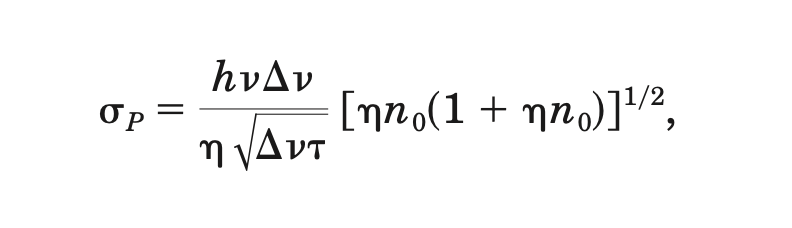

for the 1σ uncertainty in the optical power after an integration time τ, photon occupation number n0, quantum efficiency η, optical bandwidth Δν. The first term is Poisson noise, and the second term accounts for photon correlations or bunching.

In [57]:
h = CC.h
c = CC.c
k = CC.k_B
λ = 30*uu.cm
ν = (c/λ).cgs
η = 0.5
T = 5500 * uu.Kelvin
dλ = λ/100
Δν = ((c/λ**2)*dλ).cgs
τ = 1e-9*uu.s

In [58]:

def noise(ν, T):
    """ Return [thermal, shot] noise """
    hν = h*ν
    kT = k*T
    n = 1/(np.exp(hν/kT)-1)
    pre = hν * Δν/(η*np.sqrt(Δν*τ))
    
    return( pre * η * n,

          pre * np.sqrt(η * n))

In [59]:
Ts = np.linspace(1,10_000, 500) * uu.Kelvin
σ_thermal, σ_shot  = noise(ν, Ts)

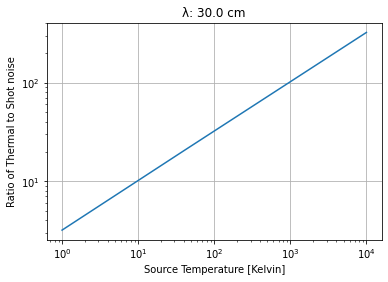

In [60]:
loglog(Ts, σ_thermal / σ_shot)
xlabel("Source Temperature [Kelvin]")
ylabel("Ratio of Thermal to Shot noise")
title("λ: %s" % λ)
grid(True)